In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def Shrink_img(img, step):
    m,n = img.shape
    small_img = np.zeros((int(m / step), int(n / step)), np.uint8)
    for i in range(int(m / step)):
        for j in range(int(n / step)):
                small_img[i, j] = img[i * step, j * step]
    return small_img

(1496, 2044)

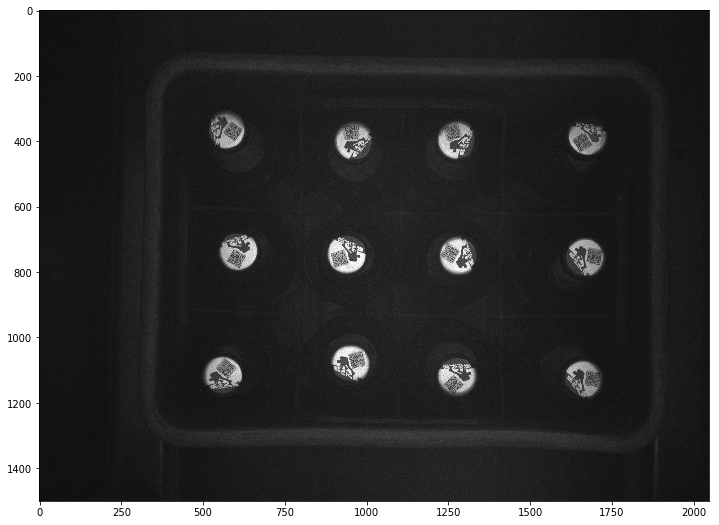

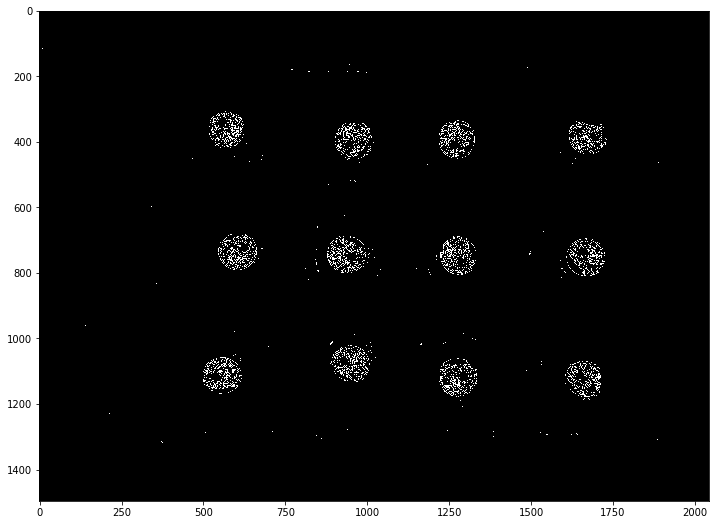

In [3]:
img = cv2.imread("Beer/Good/0.tif")#读入图像
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#将图像转化为灰度图像
small_img = Shrink_img(image, 2)
plt.figure(figsize=(12, 16))
plt.imshow(small_img, cmap='gray')
canny = cv2.Canny(small_img, 60, 80)
m, n = canny.shape
canny = canny[2: m - 2, 2: n - 2]
cv2.imwrite("canny.jpeg", canny)
plt.figure(figsize=(12, 16))
plt.imshow(canny, cmap='gray')
canny.shape

In [4]:
a, b = np.where(canny==255)
edge_T = np.vstack((a, b))
edge = edge_T.T
edge.shape

(34872, 2)

和图片看起来位置对应的图

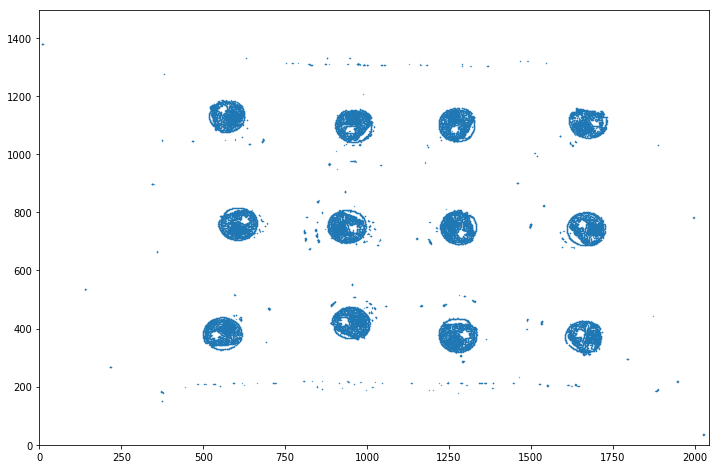

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlim(0, 2044)
plt.ylim(0, 1496)
ax.scatter(edge[:, 1], 1496-edge[:, 0], s = 0.1)

根据数字坐标画出来的图

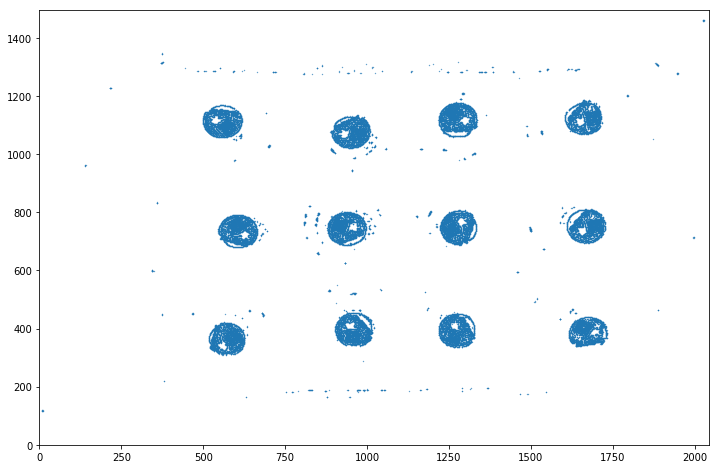

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlim(0, 2044)
plt.ylim(0, 1496)
ax.scatter(edge[:, 1], edge[:, 0], s = 0.1)

In [7]:
x_center, y_center = edge[:, 1].mean(), edge[:, 1].mean()
x_center,y_center

(1104.0390284468915, 1104.0390284468915)

In [14]:
initial_centroids = initial_centroids = np.array([[600, 1150], [950, 1100], [1250, 1150], [1650, 1150], [600, 750], [900, 750],[1250, 750], [1650, 750], [600, 400], [900, 400],[1250, 400], [1650, 400]])
initial_centroids.shape

(12, 2)

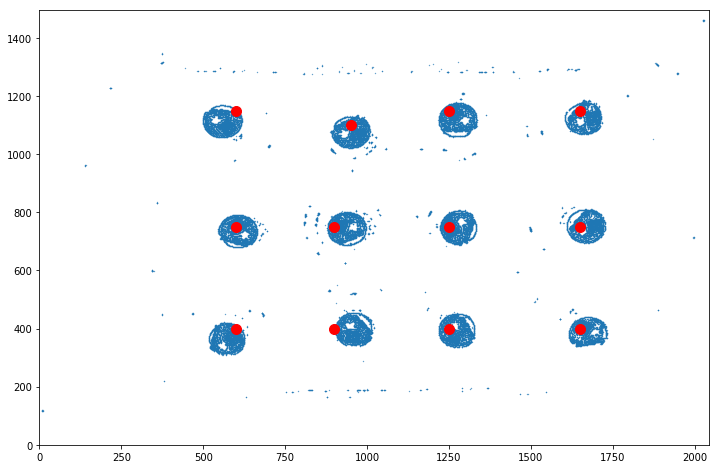

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
plt.xlim(0, 2044)
plt.ylim(0, 1496)
ax.scatter(edge[:, 1], edge[:, 0], s = 0.1)
ax.scatter(initial_centroids[:, 0], initial_centroids[:, 1], s = 100, c = 'r')

In [8]:
# 初始化聚类中心
def init_centroids(X):
    x_center, y_center = X[:, 1].mean(), X[:, 1].mean()
    
    
#     centroids = np.zeros((k, n))
#     idx = np.random.randint(0, m, k)
    
#     for i in range(k):
#         centroids[i,:] = X[idx[i],:]
    
#     return centroids

In [9]:
# 给每个点分配最近的聚类中心
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [17]:
idx = find_closest_centroids(edge, initial_centroids)
display(idx)

array([8., 8., 8., ..., 3., 3., 3.])

In [12]:
# 计算新的聚类中心
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [13]:
compute_centroids(X, idx, 12)

NameError: name 'X' is not defined

In [ ]:
# K近邻的整体代码
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids